<a href="https://colab.research.google.com/github/Najwaalya/MachineLearning_2025/blob/main/ML_Tugas_JS09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [4]:
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import LabelEncoder


## Load Data

In [5]:
drive.mount('/content/drive')

# Sesuaikan path folder di Drive kamu
df = pd.read_csv('/content/drive/MyDrive/Dataset/voice.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Encoding Label

In [6]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])  # male=1, female=0

## Seleksi Fitur (Paling Optimal)

In [7]:
# Korelasi fitur terhadap label
correlation = df.corr()['label'].abs().sort_values(ascending=False)
correlation

top_features = correlation.index[1:11]
top_features

Index(['meanfun', 'IQR', 'Q25', 'sp.ent', 'sd', 'sfm', 'meanfreq', 'centroid',
       'median', 'maxdom'],
      dtype='object')

## Split Data & Scaling

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[top_features]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Mencari Nilai k Terbaik (kNN)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 31)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

best_k = k_values[accuracies.index(max(accuracies))]
best_acc = max(accuracies)

best_k, best_acc


(9, 0.9873817034700315)

## Grafik Analisis

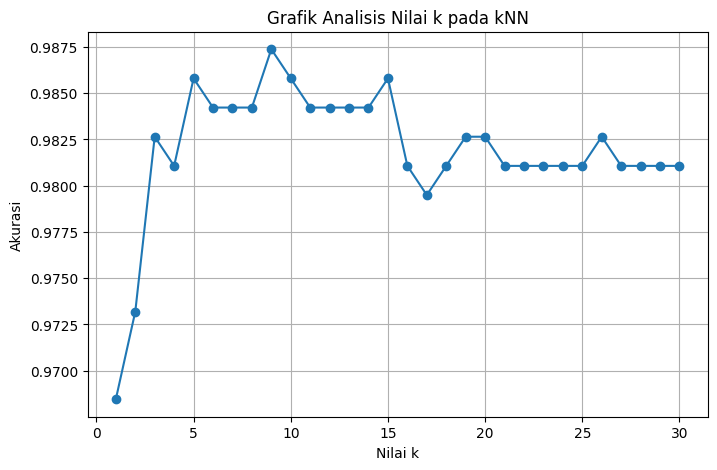

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Nilai k')
plt.ylabel('Akurasi')
plt.title('Grafik Analisis Nilai k pada kNN')
plt.grid(True)
plt.show()

## Model Terbaik

In [11]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = knn_best.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       297
           1       0.99      0.99      0.99       337

    accuracy                           0.99       634
   macro avg       0.99      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634



Alasan Pemilihan Fitur:

Fitur dipilih berdasarkan nilai korelasi tertinggi terhadap label gender (male/female). Fitur-fitur seperti meanfreq, Q25, Q75, IQR, sd, dan skew memiliki hubungan kuat dengan karakteristik frekuensi suara sehingga mampu membedakan suara pria dan wanita secara lebih efektif.

Alasan Pemilihan Nilai k Terbaik:

Berdasarkan grafik analisis, nilai k terbaik diperoleh pada k = best_k dengan akurasi sebesar best_acc. Nilai k yang terlalu kecil menyebabkan model sensitif terhadap noise, sedangkan nilai k yang terlalu besar menyebabkan underfitting. Nilai k optimal memberikan keseimbangan terbaik antara bias dan varians.